In [20]:
# Logistic Regression from Scratch
# with mathematical explanations and derivations

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

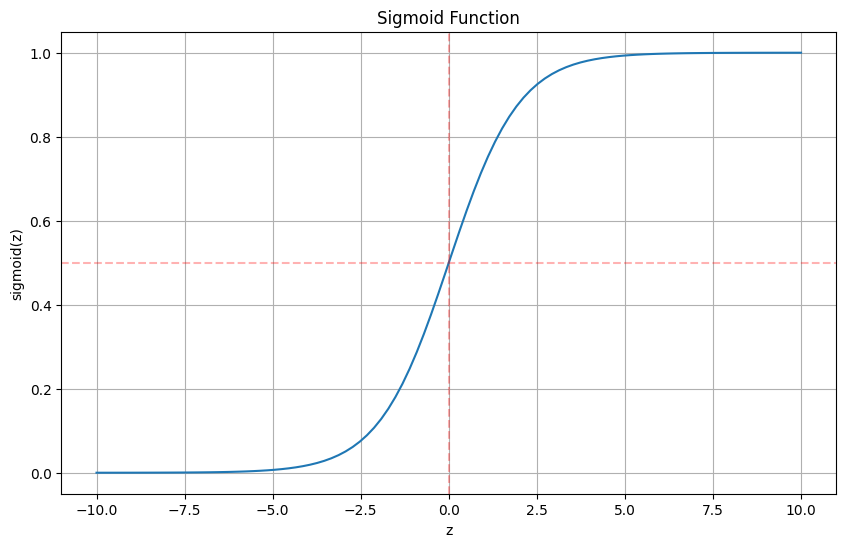

In [21]:
def sigmoid(z):
    """
    Sigmoid activation function: f(z) = 1 / (1 + e^(-z))
    
    Parameters:
        z (float or array): Input value(s)
    
    Returns:
        float or array: Sigmoid output, which is always between 0 and 1
    """
    return 1 / (1 + np.exp(-z))

# Visualize the sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_values)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Two variables: heights and weights
height = np.array([150, 160, 170, 180, 190])
weight = np.array([50, 60, 70, 80, 90])

# Covariance
cov_matrix = np.cov(height, weight)
cov_value = cov_matrix[0][1]

cov_matrix

array([[250., 250.],
       [250., 250.]])

In [23]:
# Correlation
corr_matrix = np.corrcoef(height, weight)
corr_value = corr_matrix[0][1]

print(f"Covariance: {cov_value:.2f}")
print(f"Correlation: {corr_value:.2f}")
corr_matrix

Covariance: 250.00
Correlation: 1.00


array([[1., 1.],
       [1., 1.]])

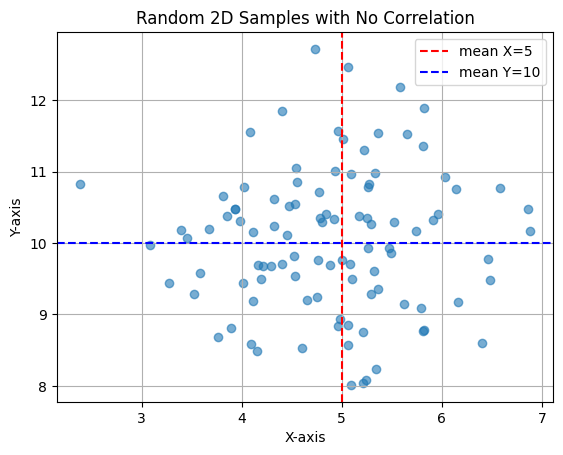

(100, 2)


In [24]:

mean = [5, 10]
cov = [[1, 0], [0, 1]]  # No correlation
samples = np.random.multivariate_normal(mean, cov, size=100)

plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6)
plt.axvline(x=5, color='red', linestyle='--', label='mean X=5')
plt.axhline(y=10, color='blue', linestyle='--', label='mean Y=10')
plt.title("Random 2D Samples with No Correlation")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
# plt.ylim(0, 15)  # 🔸 Set Y-axis range
plt.grid(True)
plt.show()

print(samples.shape)

In [25]:
def compute_cost(X, y, w, b):
    """
    Compute the cost function for logistic regression
    
    Parameters:
        X (ndarray): Input features, shape (n_samples, n_features)
        y (ndarray): Target labels, shape (n_samples,)
        w (ndarray): Model weights, shape (n_features,)
        b (float): Model bias
        
    Returns:
        float: Cost value
    """
    m = X.shape[0]  # number of examples
    
    # Calculate predicted probabilities
    z = np.dot(X, w) + b
    predicted_proba = sigmoid(z)
    
    # Calculate cost using binary cross-entropy
    cost = -1/m * np.sum(y * np.log(predicted_proba) + (1-y) * np.log(1-predicted_proba))
    
    return cost

In [26]:
def compute_gradients(X, y, w, b):
    """
    Compute the gradients of the cost function
    
    Parameters:
        X (ndarray): Input features, shape (n_samples, n_features)
        y (ndarray): Target labels, shape (n_samples,)
        w (ndarray): Model weights, shape (n_features,)
        b (float): Model bias
        
    Returns:
        tuple: (dw, db) where dw is gradient with respect to w and db is gradient with respect to b
    """
    m, n = X.shape  # m is the number of examples, n is number of features
    
    # Predicted probabilities
    z = np.dot(X, w) + b
    predicted_proba = sigmoid(z)
    
    # Calculate the error
    error = predicted_proba - y
    
    # Calculate gradients
    dw = 1/m * np.dot(X.T, error)  # shape (n_features,)
    db = 1/m * np.sum(error)       # single value
    
    return dw, db

In [27]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iterations, print_every=100):
    """
    Perform gradient descent to optimize the parameters
    
    Parameters:
        X (ndarray): Input features, shape (n_samples, n_features)
        y (ndarray): Target labels, shape (n_samples,)
        w_init (ndarray): Initial weights, shape (n_features,)
        b_init (float): Initial bias
        alpha (float): Learning rate
        num_iterations (int): Number of iterations to run
        print_every (int): How often to print the cost
        
    Returns:
        tuple: (w, b, costs) optimized weights, bias, and the cost history
    """
    # Initialize parameters and cost history
    w = w_init.copy()
    b = b_init
    costs = []
    
    for i in range(num_iterations):
        # Calculate gradients
        dw, db = compute_gradients(X, y, w, b)
        
        # Update parameters
        w = w - alpha * dw
        b = b - alpha * db
        
        # Calculate and store cost every `print_every` iterations
        if i % print_every == 0:
            cost = compute_cost(X, y, w, b)
            costs.append(cost)
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return w, b, costs

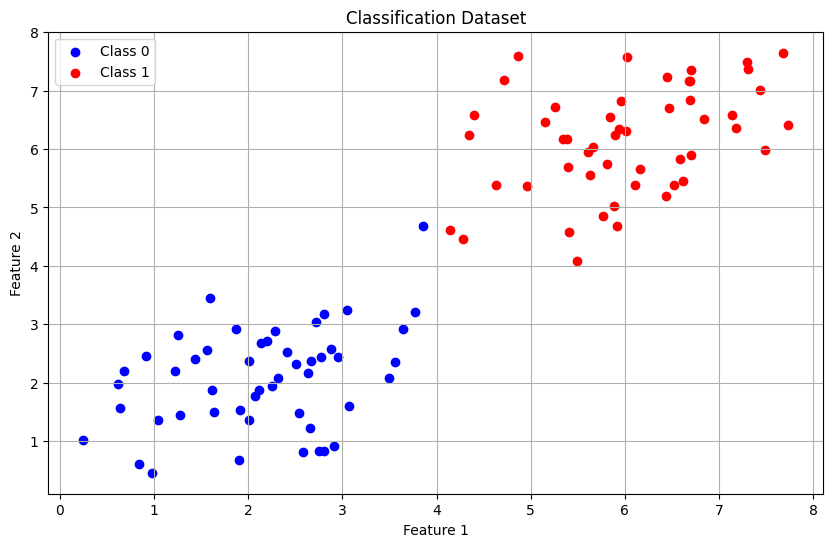

In [28]:
# Create a simple classification dataset with two features
np.random.seed(42)
n_samples = 100

# Class 0 (negative) examples
X_neg = np.random.multivariate_normal(
    mean=[2, 2],    # Center of negative class
    cov=[[1, 0.5], [0.5, 1]],  # Covariance matrix
    size=n_samples//2
)

# Class 1 (positive) examples
X_pos = np.random.multivariate_normal(
    mean=[6, 6],    # Center of positive class
    cov=[[1, 0.5], [0.5, 1]],  # Covariance matrix
    size=n_samples//2
)

#The matrix [[1, 0.2, 0.1], [0.2, 1, 0.3], [0.1, 0.3, 1]] is a covariance matrix for a 3D multivariate normal distribution. Let me explain what each value means:
#The covariance matrix is a square matrix whose elements represent the covariance between different variables (or the variance when on the diagonal).
#For a 3D distribution, we have 3 variables, let's call them X, Y, and Z. The covariance matrix can be labeled as:
#    [[Var(X), Cov(X,Y), Cov(X,Z)],
#     [Cov(Y,X), Var(Y), Cov(Y,Z)],
#     [Cov(Z,X), Cov(Z,Y), Var(Z)]]
# Diagonal elements (values of 1 in this case):
# The (1,1) element: Var(X) = 1, meaning variable X has variance 1
# The (2,2) element: Var(Y) = 1, meaning variable Y has variance 1
# The (3,3) element: Var(Z) = 1, meaning variable Z has variance 1
# Off-diagonal elements (the correlation values):
# The (1,2) and (2,1) elements: Cov(X,Y) = Cov(Y,X) = 0.2
# The (1,3) and (3,1) elements: Cov(X,Z) = Cov(Z,X) = 0.1
# The (2,3) and (3,2) elements: Cov(Y,Z) = Cov(Z,Y) = 0.3
# Since covariance = correlation × standard deviation of X × standard deviation of Y, and here all standard # deviations are 1 (since variances are 1), the covariance values are equal to the correlation values.
# So the correlation between:
# X and Y is 0.2 (weak positive correlation)
# X and Z is 0.1 (very weak positive correlation)
# Y and Z is 0.3 (moderate positive correlation)
# These correlation values range from -1 to 1:
# Values close to 0 indicate weak correlation
# Values close to 1 indicate strong positive correlation
# Values close to -1 indicate strong negative correlation


# Combine the two classes and create labels
X = np.vstack([X_neg, X_pos])
y = np.array([0] * (n_samples//2) + [1] * (n_samples//2))

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.legend()
plt.grid(True)
plt.show()

Iteration 0: Cost = 0.5955
Iteration 200: Cost = 0.2484
Iteration 400: Cost = 0.1609
Iteration 600: Cost = 0.1231
Iteration 800: Cost = 0.1019
Iteration 1000: Cost = 0.0883
Iteration 1200: Cost = 0.0788
Iteration 1400: Cost = 0.0718
Iteration 1600: Cost = 0.0663
Iteration 1800: Cost = 0.0620
Final weights: [0.88769454 1.02542825]
Final bias: -7.5028


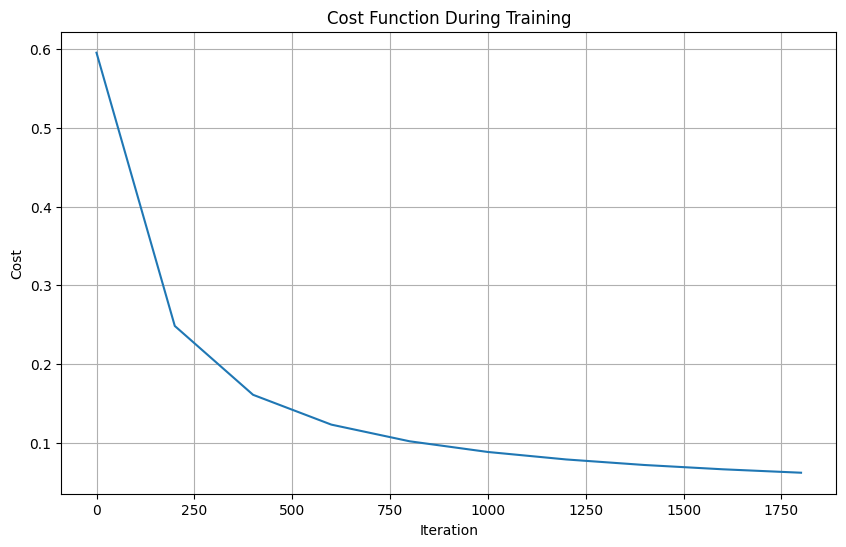

In [29]:
# Initialize parameters (weights and bias)
n_features = X.shape[1]
w_init = np.zeros(n_features)
b_init = 0

# Hyperparameters
alpha = 0.1       # Learning rate
num_iterations = 2000
print_every = 200

# Train the model using gradient descent
w_final, b_final, costs = gradient_descent(X, y, w_init, b_init, alpha, num_iterations, print_every)

# Print the final parameters
print(f"Final weights: {w_final}")
print(f"Final bias: {b_final:.4f}")

# Plot the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(0, num_iterations, print_every), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function During Training')
plt.grid(True)
plt.show()

In [30]:
def predict(X, w, b, threshold=0.5):
    """
    Make predictions using the trained logistic regression model
    
    Parameters:
        X (ndarray): Input features, shape (n_samples, n_features)
        w (ndarray): Trained weights, shape (n_features,)
        b (float): Trained bias
        threshold (float): Classification threshold (default 0.5)
        
    Returns:
        ndarray: Predicted labels (0 or 1)
    """
    # Calculate the predicted probabilities
    z = np.dot(X, w) + b
    predicted_proba = sigmoid(z)
    
    # Convert probabilities to binary predictions based on threshold
    predicted_labels = (predicted_proba >= threshold).astype(int)
    
    return predicted_labels, predicted_proba

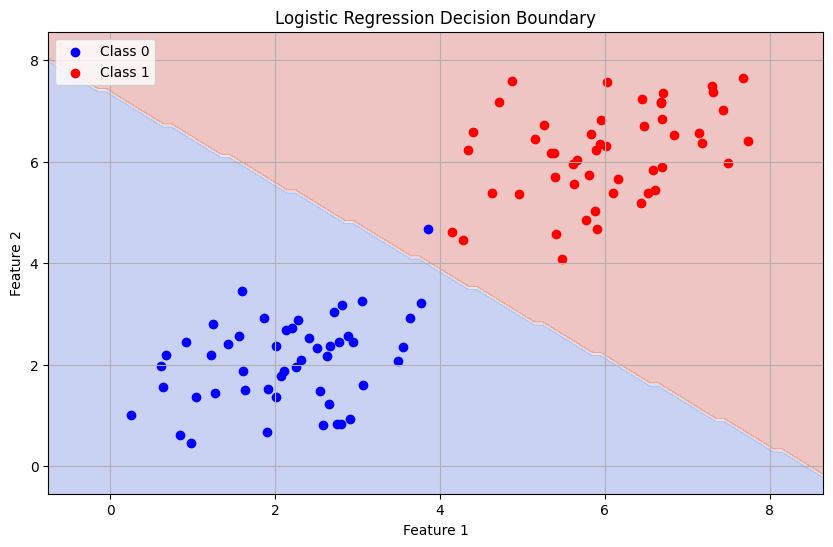

In [31]:
def plot_decision_boundary(X, y, w, b):
    """
    Plot the decision boundary of the logistic regression model
    
    Parameters:
        X (ndarray): Input features, shape (n_samples, n_features)
        y (ndarray): Target labels, shape (n_samples,)
        w (ndarray): Trained weights, shape (n_features,)
        b (float): Trained bias
    """
    # Create a grid over the feature space
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                          np.arange(x2_min, x2_max, 0.1))
    
    # Flatten the grid points
    grid_points = np.c_[xx1.ravel(), xx2.ravel()]
    
    # Make predictions on all grid points
    predictions, _ = predict(grid_points, w, b)
    
    # Reshape the predictions to match the grid
    predictions = predictions.reshape(xx1.shape)
    
    # Plot the decision boundary and data points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx1, xx2, predictions, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, w_final, b_final)

In [32]:
def evaluate_model(X, y, w, b):
    """
    Evaluate the logistic regression model
    
    Parameters:
        X (ndarray): Input features, shape (n_samples, n_features)
        y (ndarray): True labels, shape (n_samples,)
        w (ndarray): Trained weights, shape (n_features,)
        b (float): Trained bias
        
    Returns:
        dict: Performance metrics (accuracy, precision, recall, f1-score)
    """
    # Get predictions
    y_pred, y_proba = predict(X, w, b)
    
    # Calculate metrics
    accuracy = np.mean(y_pred == y)
    
    # Calculate confusion matrix elements
    true_positive = np.sum((y_pred == 1) & (y == 1))
    false_positive = np.sum((y_pred == 1) & (y == 0))
    true_negative = np.sum((y_pred == 0) & (y == 0))
    false_negative = np.sum((y_pred == 0) & (y == 1))
    
    # Calculate precision and recall
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    
    # Calculate F1 score
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': {
            'true_positive': true_positive,
            'false_positive': false_positive,
            'true_negative': true_negative,
            'false_negative': false_negative
        }
    }

# Evaluate the model
metrics = evaluate_model(X, y, w_final, b_final)

# Print the metrics
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print("\nConfusion Matrix:")
print(f"True Positive: {metrics['confusion_matrix']['true_positive']}")
print(f"False Positive: {metrics['confusion_matrix']['false_positive']}")
print(f"True Negative: {metrics['confusion_matrix']['true_negative']}")
print(f"False Negative: {metrics['confusion_matrix']['false_negative']}")

Accuracy: 0.9900
Precision: 0.9804
Recall: 1.0000
F1 Score: 0.9901

Confusion Matrix:
True Positive: 50
False Positive: 1
True Negative: 49
False Negative: 0


## Comparing with scikit-learn

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the scikit-learn model
sk_model = LogisticRegression(random_state=42)
sk_model.fit(X, y)

# Make predictions
y_pred_sk = sk_model.predict(X)

# Calculate metrics
accuracy_sk = accuracy_score(y, y_pred_sk)
precision_sk = precision_score(y, y_pred_sk)
recall_sk = recall_score(y, y_pred_sk)
f1_sk = f1_score(y, y_pred_sk)
conf_matrix_sk = confusion_matrix(y, y_pred_sk)

# Print the metrics
print("Scikit-learn Logistic Regression Results:")
print(f"Accuracy: {accuracy_sk:.4f}")
print(f"Precision: {precision_sk:.4f}")
print(f"Recall: {recall_sk:.4f}")
print(f"F1 Score: {f1_sk:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_sk)

Scikit-learn Logistic Regression Results:
Accuracy: 0.9900
Precision: 0.9804
Recall: 1.0000
F1 Score: 0.9901

Confusion Matrix:
[[49  1]
 [ 0 50]]


## Real-world Example: Predicting Diabetes

In [34]:
# Import the Pima Indians Diabetes dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare the diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = (diabetes.target > diabetes.target.mean()).astype(int)  # Convert to binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model parameters
n_features_diabetes = X_train_scaled.shape[1]
w_init_diabetes = np.zeros(n_features_diabetes)
b_init_diabetes = 0

# Hyperparameters
alpha_diabetes = 0.01
num_iterations_diabetes = 5000
print_every_diabetes = 1000

# Train the model
w_final_diabetes, b_final_diabetes, costs_diabetes = gradient_descent(
    X_train_scaled, y_train, w_init_diabetes, b_init_diabetes, 
    alpha_diabetes, num_iterations_diabetes, print_every_diabetes
)

# Evaluate the model on the test set
diabetes_metrics = evaluate_model(X_test_scaled, y_test, w_final_diabetes, b_final_diabetes)

# Print the test metrics
print("\nDiabetes Dataset Results:")
print(f"Test Accuracy: {diabetes_metrics['accuracy']:.4f}")
print(f"Test Precision: {diabetes_metrics['precision']:.4f}")
print(f"Test Recall: {diabetes_metrics['recall']:.4f}")
print(f"Test F1 Score: {diabetes_metrics['f1_score']:.4f}")

Iteration 0: Cost = 0.6907
Iteration 1000: Cost = 0.4788
Iteration 2000: Cost = 0.4742
Iteration 3000: Cost = 0.4735
Iteration 4000: Cost = 0.4733

Diabetes Dataset Results:
Test Accuracy: 0.7191
Test Precision: 0.7188
Test Recall: 0.5897
Test F1 Score: 0.6479


### Another example of logistic regression